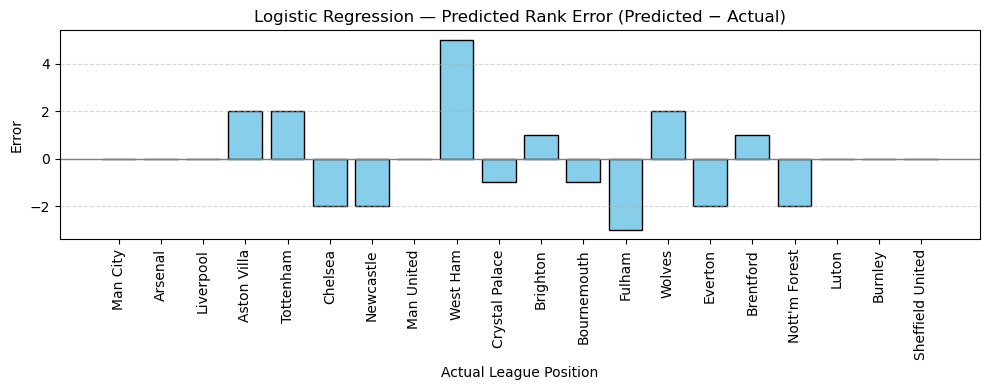

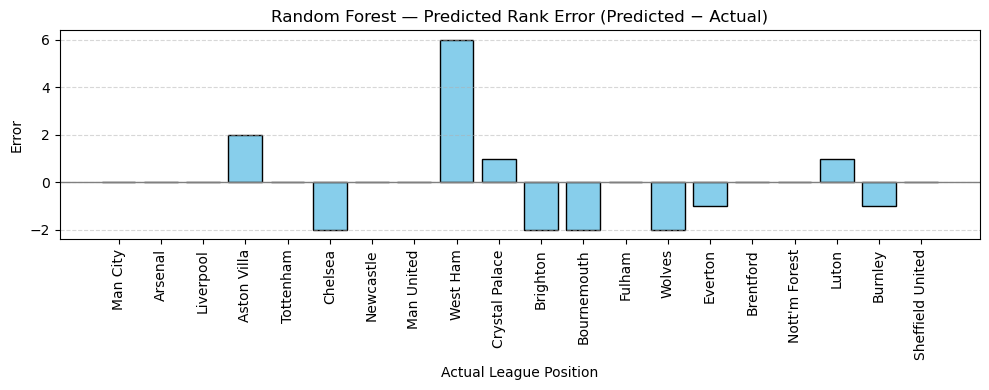

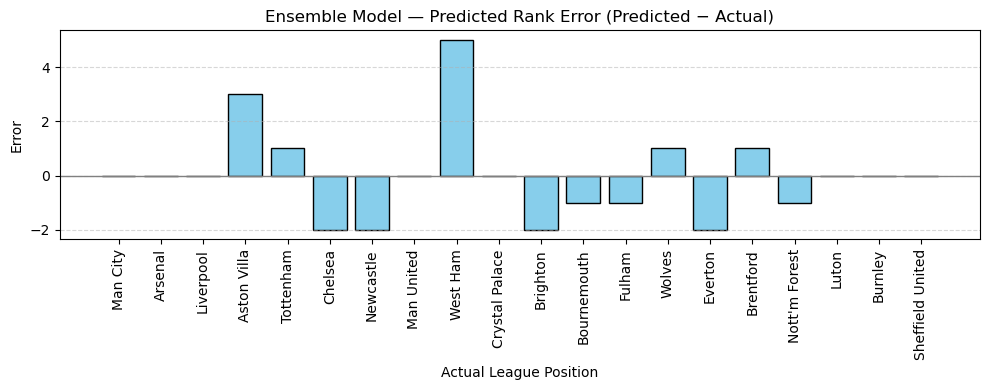

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

actual_df = pd.read_csv("Tables/Actual_league_table.csv")

lr_df = pd.DataFrame({
    "Team":[
        "Man City","Arsenal","Liverpool","Man United","Burnley","Sheffield United",
        "Luton","Bournemouth","Brentford","Brighton","Crystal Palace","Everton",
        "Tottenham","Aston Villa","Newcastle","Chelsea","Nott'm Forest","Wolves",
        "Fulham","West Ham"
    ],
    "Predicted_Rank":[
        1,2,3,8,19,20,18,11,17,12,9,13,7,6,5,4,15,16,10,14
    ]
})

rf_df = pd.DataFrame({
    "Team":[
        "Man City","Arsenal","Liverpool","Aston Villa","Tottenham","Man United","Newcastle",
        "Fulham","Brentford","Sheffield United","Nott'm Forest","Crystal Palace",
        "Everton","Luton","Burnley","Chelsea","Bournemouth","Brighton","Wolves","West Ham"
    ],
    "Predicted_Rank":[
        1,2,3,6,5,8,7,13,16,20,17,11,14,19,18,4,10,9,12,15
    ]
})

ens_df = pd.DataFrame({
    "Team":[
        "Man City","Arsenal","Liverpool","Man United","Crystal Palace","Sheffield United",
        "Burnley","Luton","Brentford","Fulham","Bournemouth","Wolves","Nott'm Forest",
        "Tottenham","Chelsea","Newcastle","Brighton","Everton","Aston Villa","West Ham"
    ],
    "Predicted_Rank":[
        1,2,3,8,10,20,19,18,17,12,11,15,16,6,4,5,9,13,7,14
    ]
})

def plot_residuals(pred_df, model_name):

    df = actual_df[["Team","Pos"]].merge(
        pred_df, on="Team", how="inner"
    ).rename(columns={"Pos":"Actual_Rank"})
    

    df["Residual"] = df["Predicted_Rank"] - df["Actual_Rank"]
    

    df = df.sort_values("Actual_Rank")
    

    plt.figure(figsize=(10,4))
    bars = plt.bar(
        df["Actual_Rank"], df["Residual"],
        color="skyblue", edgecolor="black"
    )
    plt.axhline(0, color="gray", linewidth=1)
    plt.title(f"{model_name} — Predicted Rank Error (Predicted − Actual)")
    plt.xlabel("Actual League Position")
    plt.ylabel("Error")
    plt.xticks(df["Actual_Rank"], df["Team"], rotation=90)
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

# Plot for each model
plot_residuals(lr_df, "Logistic Regression")
plot_residuals(rf_df, "Random Forest")
plot_residuals(ens_df, "Ensemble Model")


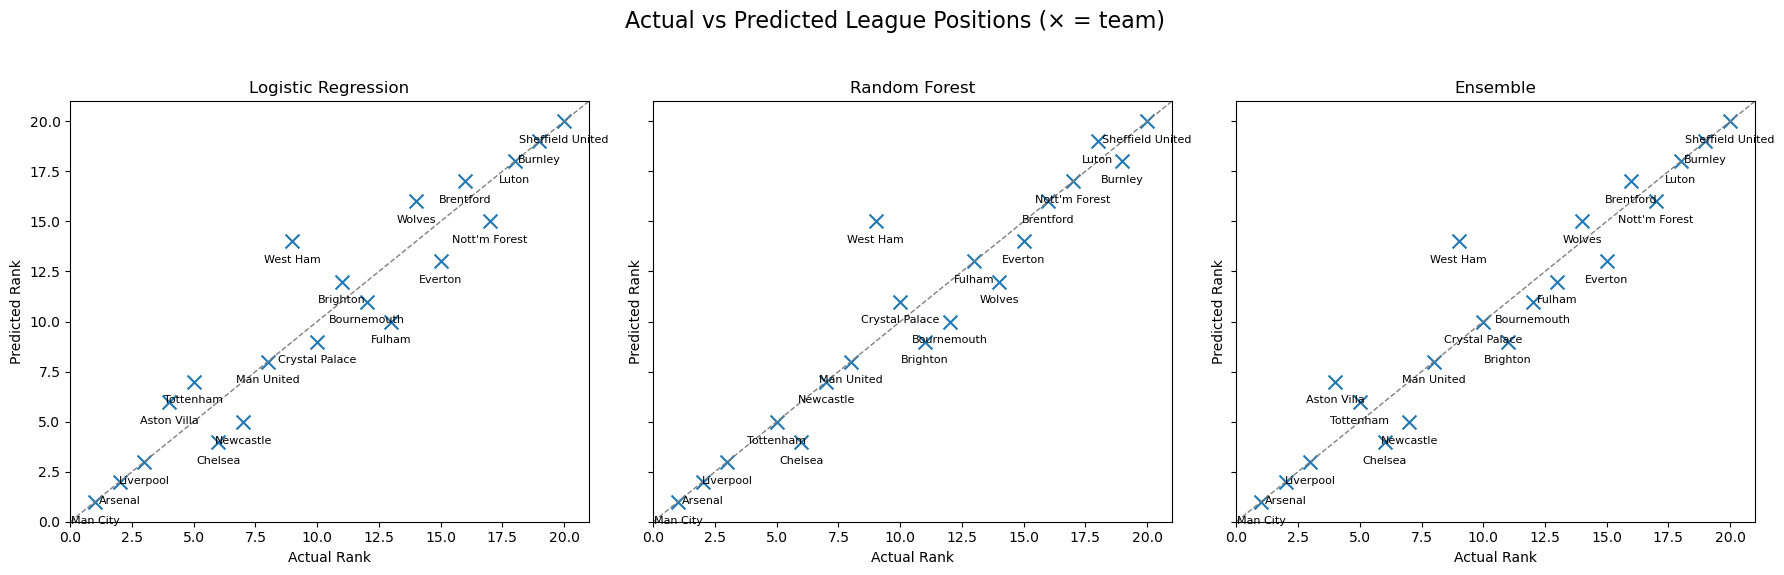

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

actual_df = pd.read_csv("Tables/Actual_league_table.csv")  

lr_df = pd.DataFrame({
    "Team": ["Man City","Arsenal","Liverpool","Man United","Burnley","Sheffield United",
             "Luton","Bournemouth","Brentford","Brighton","Crystal Palace","Everton",
             "Tottenham","Aston Villa","Newcastle","Chelsea","Nott'm Forest","Wolves",
             "Fulham","West Ham"],
    "Predicted_Rank": [1,2,3,8,19,20,18,11,17,12,9,13,7,6,5,4,15,16,10,14]
})

rf_df = pd.DataFrame({
    "Team": ["Man City","Arsenal","Liverpool","Tottenham","Man United","Newcastle",
             "Fulham","Brentford","Sheffield United","Nott'm Forest","Crystal Palace",
             "Everton","Luton","Burnley","Chelsea","Bournemouth","Brighton","Wolves","West Ham"],
    "Predicted_Rank": [1,2,3,5,8,7,13,16,20,17,11,14,19,18,4,10,9,12,15]
})

ens_df = pd.DataFrame({
    "Team": ["Man City","Arsenal","Liverpool","Man United","Crystal Palace","Sheffield United",
             "Burnley","Luton","Brentford","Fulham","Bournemouth","Wolves","Nott'm Forest",
             "Tottenham","Chelsea","Newcastle","Brighton","Everton","Aston Villa","West Ham"],
    "Predicted_Rank": [1,2,3,8,10,20,19,18,17,12,11,15,16,6,4,5,9,13,7,14]
})

def merge_actual(pred_df):
    return (pred_df
            .merge(actual_df[['Team','Pos']], on='Team')
            .rename(columns={'Pos':'Actual_Rank'}))

lr = merge_actual(lr_df)
rf = merge_actual(rf_df)
ens = merge_actual(ens_df)

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

for ax, (title, df) in zip(axes, [
    ("Logistic Regression", lr),
    ("Random Forest",       rf),
    ("Ensemble",            ens),
]):
    ax.scatter(df['Actual_Rank'], df['Predicted_Rank'], marker='x', s=100)
    ax.plot([0, 21], [0, 21], '--', lw=1,color="gray")

    for _, row in df.iterrows():
        ax.annotate(
            row['Team'],
            (row['Actual_Rank'], row['Predicted_Rank']),
            textcoords="offset points",
            xytext=(0, -10),
            ha='center',
            va='top',
            fontsize=8
        )

    ax.set_title(title)
    ax.set_xlabel("Actual Rank")
    ax.set_ylabel("Predicted Rank")
    ax.set_xlim(0, 21)
    ax.set_ylim(0, 21)

plt.suptitle("Actual vs Predicted League Positions (× = team)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
